In [181]:
import numpy as np #работа с многомерными массивами
import pandas as pd #работа с числовыми таблицами и временными рядами
import matplotlib.pyplot as plt #визуализация (графики)
import scipy #пакет прикладных математических процедур
import scipy.stats as stats #статистические функции/критерии
import seaborn as sns #статистические графики
import math #математические операции с числами

# 1.Разеведочный анализ данных (EDA)

## 1.1. Импорт данных + знакомство

Набор данных содержит данные о 7 видах рыб для продажи на рынке

*   Species - видовое название рыбы
*   Weight - вес рыбы в граммах
*   Length1 - длина по вертикали в см
*   Length2 - длина по диагонали в см
*   Length3 - поперечная длина в см
*   Height - высота в см
*   Width - ширина по диагонали в см



In [182]:
fish = pd.read_csv('Fish.csv')
fish.head(n=10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [183]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Типы данных в наборе


*   Категориальный: Species
*   Количественный (непрерывный): Weight, Length1, Length2, Length3, Height, Width



In [184]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [185]:
fish[fish['Weight']==0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [186]:
fish[fish['Weight']>0].groupby('Species').agg({'Weight': ['mean', 'count']})

Weight      
                 mean count
Species                    
Bream      617.828571    35
Parkki     154.818182    11
Perch      382.239286    56
Pike       718.705882    17
Roach      160.052632    19
Smelt       11.178571    14
Whitefish  531.000000     6

In [187]:
fish.at[40,'Weight']=fish[(fish['Species']=='Roach')&(fish['Weight']>0)]['Weight'].mean() #замена значения 0 на среднее значения веса данного вида рыб
fish.iloc[40]

Species         Roach
Weight     160.052632
Length1          19.0
Length2          20.5
Length3          22.8
Height         6.4752
Width          3.3516
Name: 40, dtype: object

## 1.2. Гистограммы + описательные статистики

<Axes: >

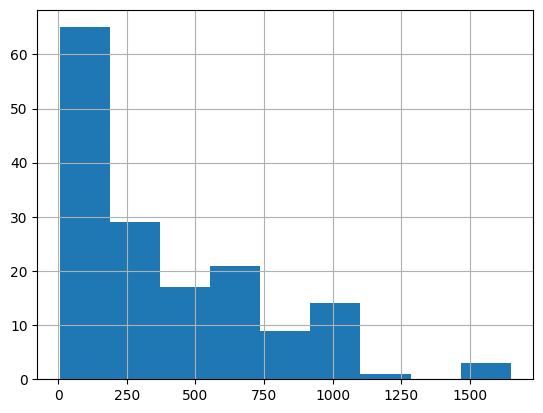

In [188]:
fish['Weight'].hist(bins='sturges')

**Правило Стёржеса**

эмпирическое правило определения оптимального количества интервалов, на которые разбивается наблюдаемый диапазон изменения случайной величины при построении гистограммы плотности её распределения

$n=1+3.322\ln N$, где $N$ - число наблюдений

In [189]:
1+3.322*math.log10(159)

8.31304124699254

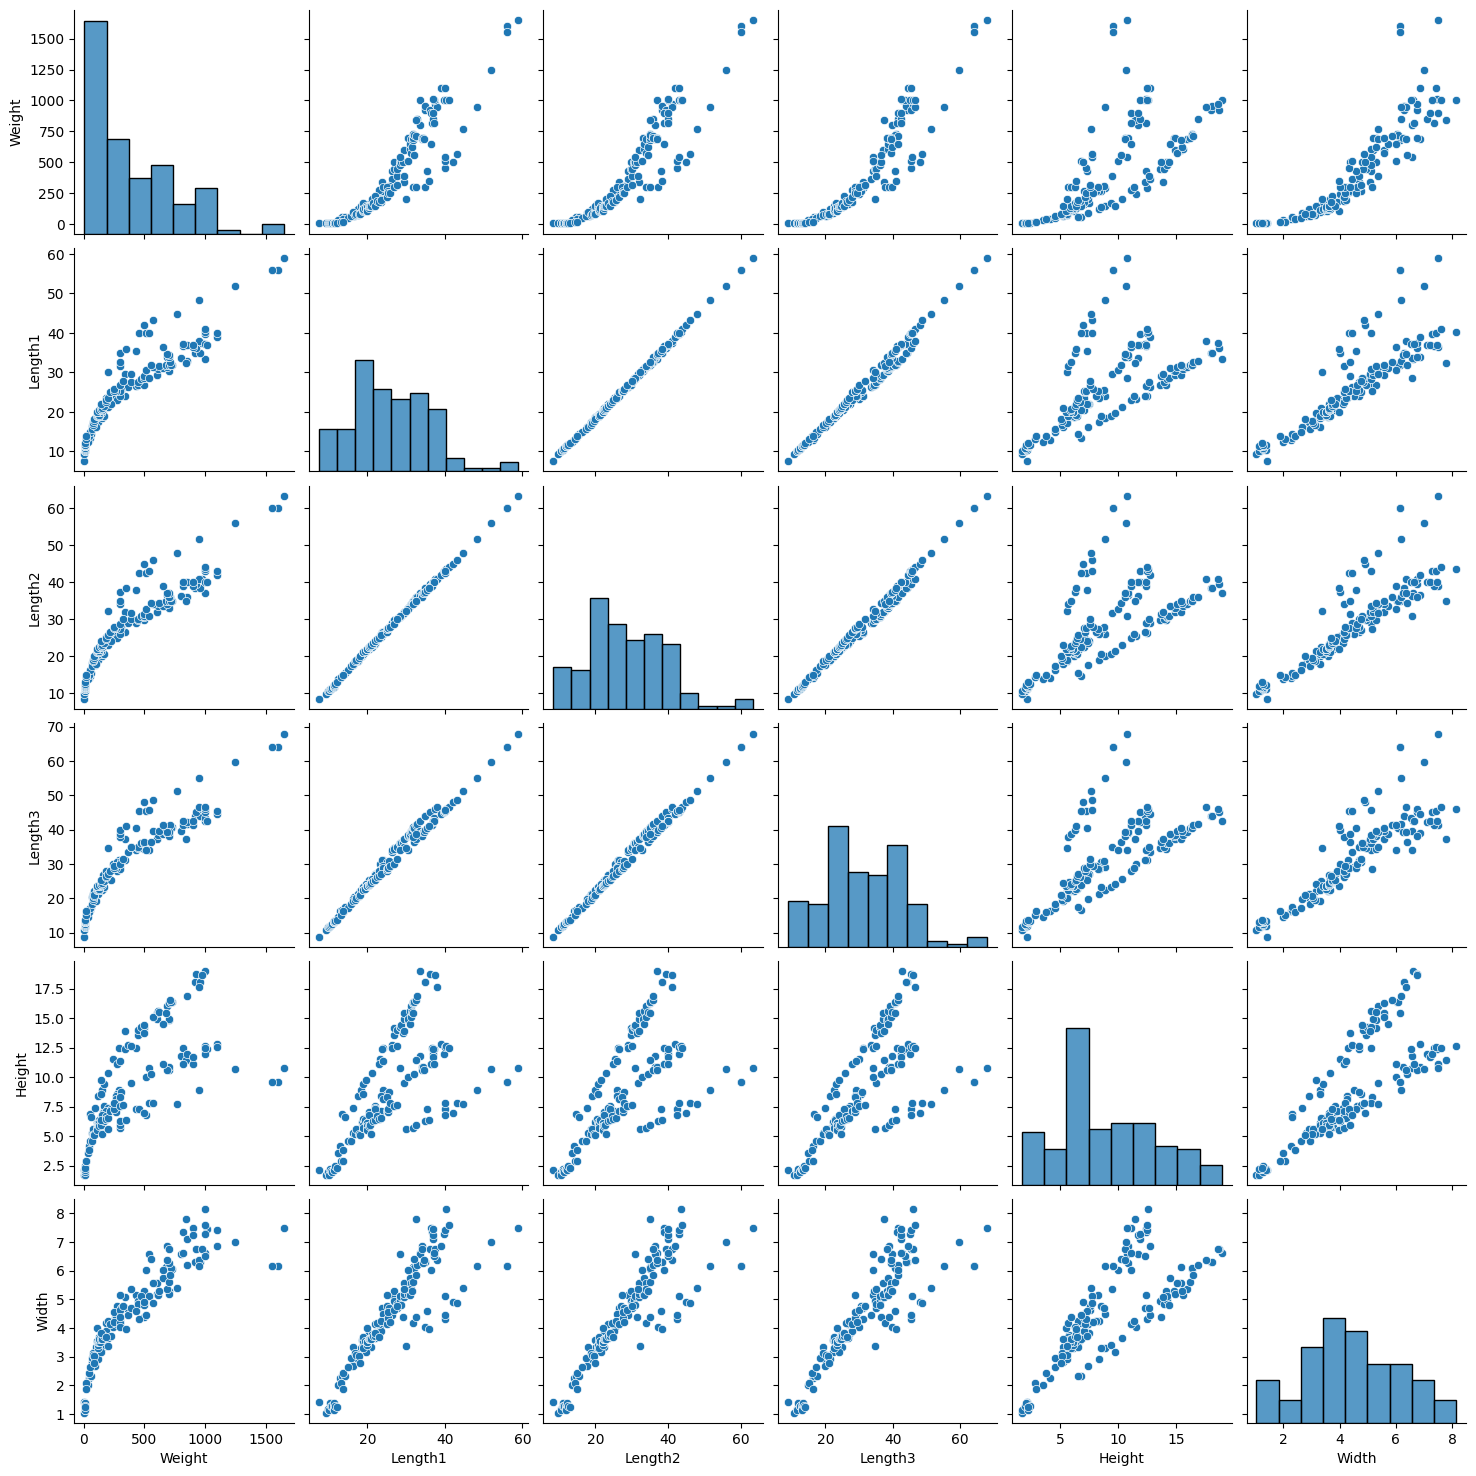

In [190]:
col = ['Weight','Length1', 'Length2', 'Length3', 'Height', 'Width']
sns.pairplot(fish.loc[:,col])

## 1.3. Проверка нормальности по критерию Шапиро-Уилка

> Работает с выборками до 5000 наблюдений (если выборка более 5000 - используем альтернативы: тест д'Агостино, критерий асимметрии и эксцесса, построение QQ-plot)

> Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05



In [191]:
stats.shapiro(fish['Weight'])

ShapiroResult(statistic=np.float64(0.8824602991414949), pvalue=np.float64(6.73636006062355e-10))

In [192]:
Norm = pd.DataFrame(columns=['p-value','Norm'], index=col)
for c in col:
  Norm.at[c,'p-value']=stats.shapiro(fish[c])[1]
  if stats.shapiro(fish[c])[1]>0.05:
    Norm.at[c,'Norm']='Normal'
  else:
    Norm.at[c,'Norm']='Unknoun'
Norm

,p-value,Norm
Weight,0.0,Unknoun
Length1,0.001771,Unknoun
Length2,0.003052,Unknoun
Length3,0.002963,Unknoun
Height,0.000185,Unknoun
Width,0.015363,Unknoun


## 1.4. Анализ влияния категориальных признаков. Критерии сравнения групп

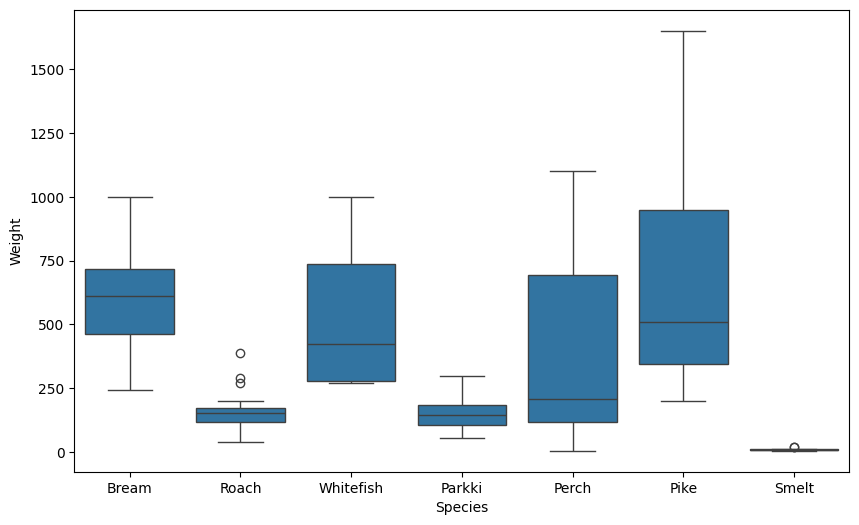

In [193]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Species', y='Weight', data=fish)

In [194]:
fish.groupby('Species')[['Weight']].median()

,Weight
Species,
Bream,610.00
Parkki,145.00
Perch,207.50
Pike,510.00
Roach,155.00
Smelt,9.85
Whitefish,423.00


**Критерий Краскала-Уоллиса**

это непараметрический критерий, используется для сравнения трех или более независимых выборок.

Гипотеза Н0: медианные значения выборок не имеют статистически значимых отличий, уровень значимости полагаем равным 0,05

In [195]:
fish1=np.array(fish[fish['Species']=='Bream']['Weight'])
fish2=np.array(fish[fish['Species']=='Parkki']['Weight'])
fish3=np.array(fish[fish['Species']=='Perch']['Weight'])
fish4=np.array(fish[fish['Species']=='Pike']['Weight'])
fish5=np.array(fish[fish['Species']=='Roach']['Weight'])
fish6=np.array(fish[fish['Species']=='Smelt']['Weight'])
fish7=np.array(fish[fish['Species']=='Whitefish']['Weight'])

stats.mstats.kruskalwallis(fish1,fish2,fish3,fish4,fish5,fish6,fish7)

KruskalResult(statistic=np.float64(79.97626227572155), pvalue=np.float64(3.613432706212754e-15))

## 1.5. Анализ влияния количественных признаков

In [196]:
fish[col].corr(method='pearson') # количественная корреляция Пирсона

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915971,0.918846,0.923319,0.724526,0.886955
Length1,0.915971,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918846,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923319,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724526,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886955,0.867050,0.873547,0.878520,0.792881,1.000000


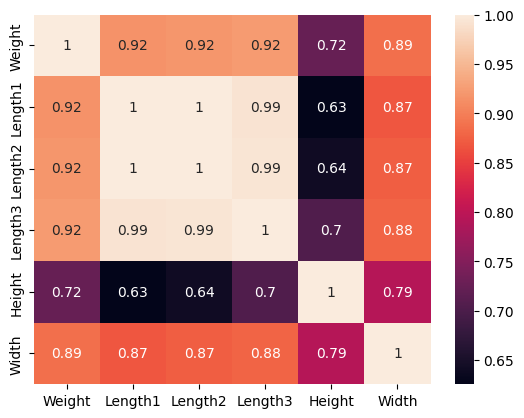

In [197]:
sns.heatmap(fish[col].corr(),annot=True);

Шкала Чеддока

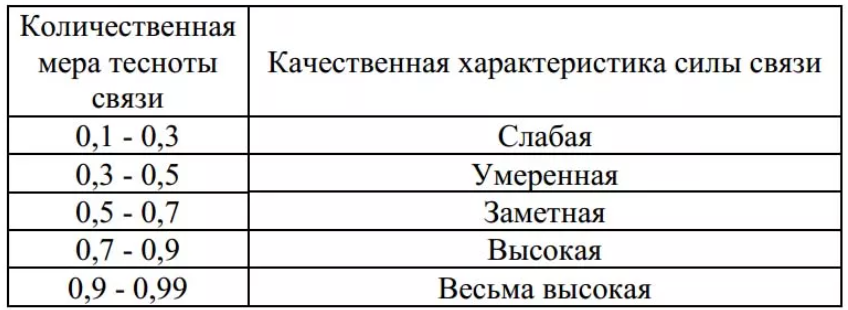

# 2.Построение нелинейной регрессии

## 2.1. Оценка параметров модели

In [198]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


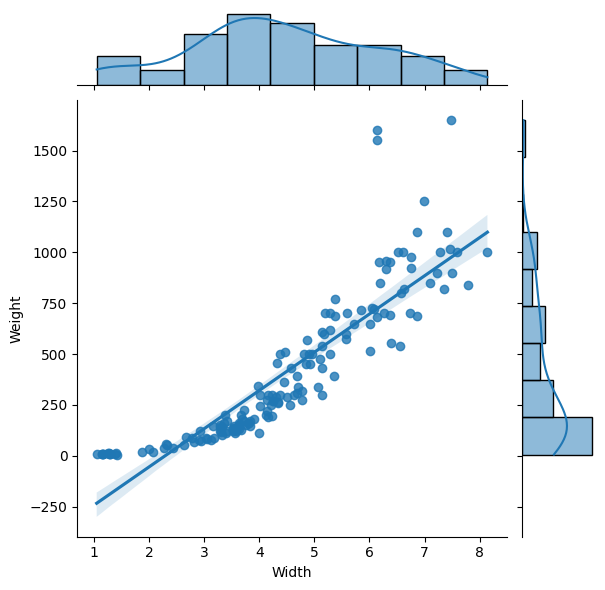

In [199]:
sns.jointplot(x = 'Width', y = 'Weight', data=fish, kind="reg")

In [200]:
import statsmodels.api as sm #библиотека для оценки множества моделей, проведения стастистических тестов
import statsmodels.formula.api as smf #интерфейс для указания моделей с использованием строк формул

In [201]:
results1 = smf.ols('Weight ~ Width', data=fish[fish['Species']=='Perch']).fit() #ols - ordinary least squares (обычный МНК)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     708.6
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.01e-32
Time:                        23:13:19   Log-Likelihood:                -332.48
No. Observations:                  56   AIC:                             669.0
Df Residuals:                      54   BIC:                             673.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -513.8451     35.901    -14.313      0.000    -585.822    -441.869
Width        188.8194      7.093     26.619      0.000     174.598     203.041
==============================================================================
Omnibus:                       18.352   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.007
Skew:                           1.240   Prob(JB):                     6.12e-06
Kurtosis:                       5.034   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Степенная: $Y=ax^bɛ$

Логарифмирование: $\ln Y=\ln(ax^bɛ)$ => $\ln Y=\ln a+b\ln x+\ln ɛ$

Замена: $Y_1=\ln Y$, $x_1=\ln x$

Что получим: $Y_1=\ln a+bx_1+\ln ɛ$

In [202]:
fish['Width1']=np.log(fish['Width'])
fish['Weight1']=np.log(fish['Weight'])

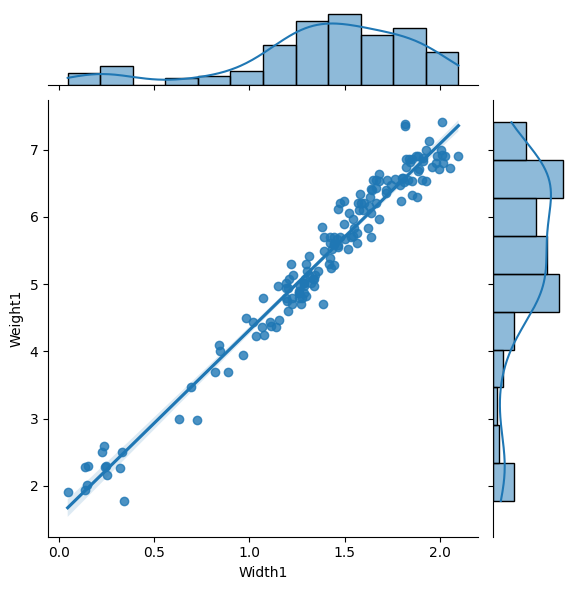

In [203]:
sns.jointplot(x = 'Width1',y = 'Weight1', data=fish, kind="reg")

In [204]:
results2 = smf.ols('Weight1 ~ Width1', data=fish).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Weight1   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3792.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          7.34e-112
Time:                        23:13:20   Log-Likelihood:                -13.136
No. Observations:                 159   AIC:                             30.27
Df Residuals:                     157   BIC:                             36.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5458      0.066     23.374      0.000       1.415       1.676
Width1         2.7715      0.045     61.579      0.000       2.683       2.860
==============================================================================
Omnibus:                        1.429   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.051
Skew:                           0.172   Prob(JB):                        0.591
Kurtosis:                       3.200   Cond. No.                         6.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
results3 = smf.ols('Weight1 ~ Width1 + Species', data=fish).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Weight1   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          1.62e-131
Time:                        23:13:20   Log-Likelihood:                 57.729
No. Observations:                 159   AIC:                            -99.46
Df Residuals:                     151   BIC:                            -74.91
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8170      0.091     20.034      0.000       1.638       1.996
Species[T.Parkki]       -0.0131      0.066     -0.200      0.842      -0.143       0.116
Species[T.Perch]        -0.3738      0.039     -9.699      0.000      -0.450      -0.298
Species[T.Pike]          0.2175      0.051      4.248      0.000       0.116       0.319
Species[T.Roach]        -0.3207      0.053     -6.098      0.000      -0.425      -0.217
Species[T.Smelt]        -0.2007      0.090     -2.224      0.028      -0.379      -0.022
Species[T.Whitefish]    -0.2223      0.076     -2.913      0.004      -0.373      -0.072
Width1                   2.7029      0.051     52.971      0.000       2.602       2.804
==============================================================================
Omnibus:                       11.682   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.558
Skew:                          -0.289   Prob(JB):                     1.26e-05
Kurtosis:                       4.752   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Мультиколлинеарность внутри признака Species

> наличие линейной зависимости между объясняющими переменными (факторами) регрессионной модели



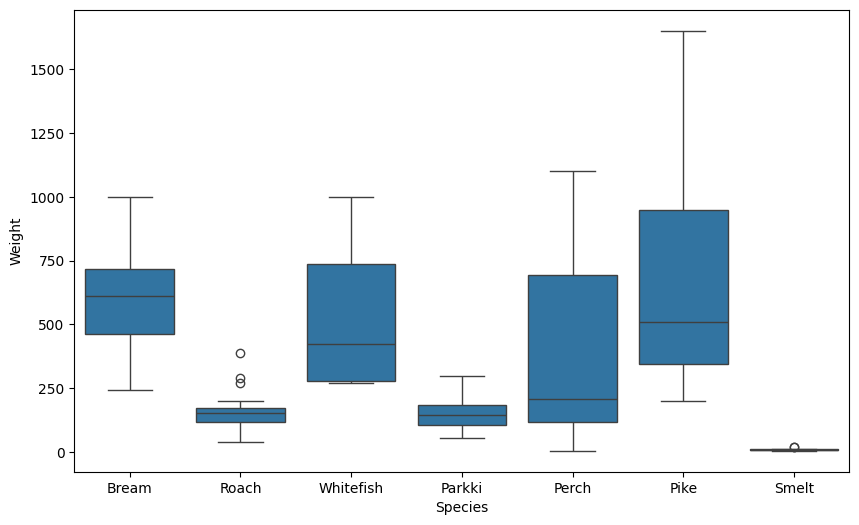

In [206]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Species', y='Weight', data=fish)

In [207]:
fish1 = fish[fish['Species']=='Parkki']['Weight']
fish2 = fish[fish['Species']=='Roach']['Weight']
scipy.stats.mannwhitneyu(fish1,fish2)

MannwhitneyuResult(statistic=np.float64(106.0), pvalue=np.float64(0.8850008201769074))

In [208]:
fish.loc[fish.Species.str.contains('Parkki|Roach'), 'Species'] = 'ParkkiAndRoach'

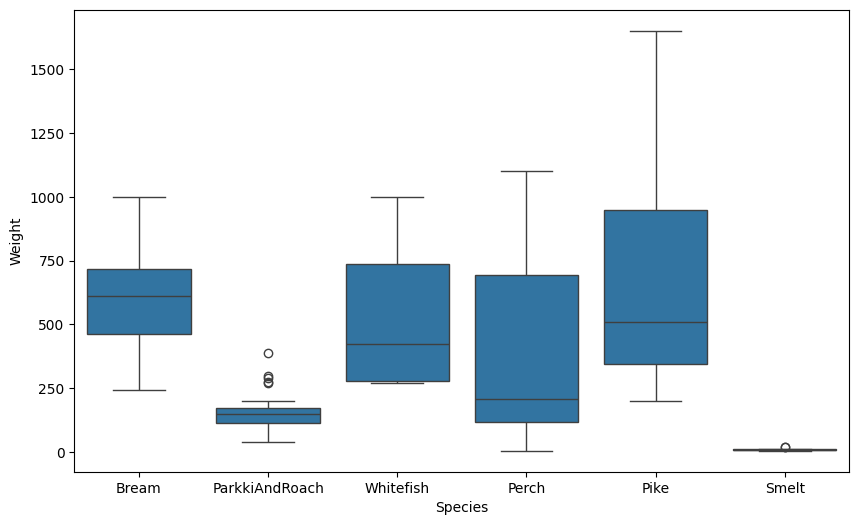

In [209]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Species', y='Weight', data=fish)

In [210]:
results4 = smf.ols('Weight1 ~ Width1 + Species', data=fish).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Weight1   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1329.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          1.38e-128
Time:                        23:13:20   Log-Likelihood:                 46.784
No. Observations:                 159   AIC:                            -79.57
Df Residuals:                     152   BIC:                            -58.08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.8580      0.096     19.275      0.000       1.668       2.048
Species[T.ParkkiAndRoach]    -0.2225      0.052     -4.314      0.000      -0.324      -0.121
Species[T.Perch]             -0.3786      0.041     -9.203      0.000      -0.460      -0.297
Species[T.Pike]               0.2156      0.055      3.943      0.000       0.108       0.324
Species[T.Smelt]             -0.2350      0.096     -2.447      0.016      -0.425      -0.045
Species[T.Whitefish]         -0.2224      0.081     -2.729      0.007      -0.383      -0.061
Width1                        2.6786      0.054     49.417      0.000       2.571       2.786
==============================================================================
Omnibus:                        5.913   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.895
Skew:                          -0.257   Prob(JB):                       0.0318
Kurtosis:                       3.881   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2. Проверка качества модели

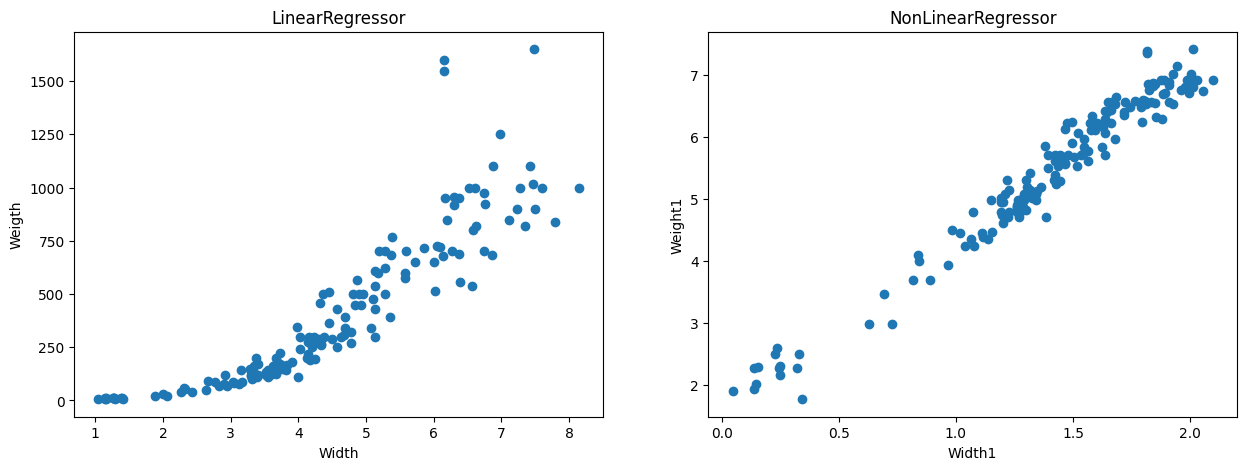

In [211]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

ax1.scatter(x=fish['Width'], y=fish['Weight'])
ax1.set_title('LinearRegressor')
ax1.set_xlabel('Width')
ax1.set_ylabel('Weigth')

ax2.scatter(x=fish['Width1'], y=fish['Weight1'])
ax2.set_title('NonLinearRegressor')
ax2.set_xlabel('Width1')
ax2.set_ylabel('Weight1')

plt.show()

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score



1.   Коэффициент детерминации $$R^2=1-\frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar y_i)^2}$$
2.   Среднеквадратическая ошибка $$MSE=\frac{1}{n}\sum(y_i-\hat{y}_i)^2$$
3.   Стандартное отклонение остатков $$RMSE=\sqrt{\frac{1}{n}\sum(y_i-\hat{y}_i)^2}$$
4.   Средняя абсолютная ошибка $$MAE=\frac{1}{n}\sum|y_i-\hat{y}_i|^2$$



In [213]:
fish = pd.concat([fish,pd.get_dummies(fish.Species, prefix_sep='',dtype='int')],axis=1)
fish

,Species,Weight,Length1,Length2,Length3,Height,Width,Width1,Weight1,Bream,ParkkiAndRoach,Perch,Pike,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1.391282,5.488938,1,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1.459917,5.669881,1,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1.546732,5.828946,1,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1.494139,5.894403,1,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1.635885,6.063785,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0.331890,2.501436,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0.238229,2.595255,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0.227773,2.501436,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0.726195,2.980619,0,0,0,0,1,0


### 2.2.1. Линейная регрессия

In [214]:
Y1=fish['Weight'] #зависимая (целевая) переменная
X1=fish[['Width','ParkkiAndRoach', 'Perch', 'Pike', 'Smelt',    'Whitefish']] #независимые факторы
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 0) #разбиение данных на обучающую и тестовую выборки

In [215]:
print('Number of data: ',fish.shape[0])
print('Number of train data: ',X1_train.shape[0])
print('Number of test data: ',X1_test.shape[0])

Number of data:  159
Number of train data:  127
Number of test data:  32


In [216]:
import sklearn.linear_model as lm #библиотека для машинного обучения

In [217]:
LR = lm.LinearRegression()

In [218]:
model1 = LR.fit(X1_train,Y1_train) #обучение на выборке train

In [219]:
model1.intercept_, model1.coef_ #коэффициенты уравнения модели

(np.float64(-469.36145642099905),
 array([ 200.60611059,  -84.65324944,  -93.71122775,  115.16399977,
         212.43876488, -194.51500372]))

In [220]:
Y1_train_pred=model1.predict(X1_train) #предсказание на train
Y1_test_pred=model1.predict(X1_test) #предсказание на test

In [221]:
QualityMetrics=['R2 train','R2 test', 'MSE train','MSE test']
Models=pd.DataFrame(index=QualityMetrics)
Models.at[QualityMetrics,'LinearRegressor']=[r2_score(Y1_train,Y1_train_pred),
                                             r2_score(Y1_test,Y1_test_pred),
                                             mean_squared_error(Y1_train,Y1_train_pred),
                                             mean_squared_error(Y1_test,Y1_test_pred)]
Models

,LinearRegressor
R2 train,0.891951
R2 test,0.812440
MSE train,11859.509579
MSE test,34962.362484


### 2.2.2. Нелинейная регрессия (линеаризация)

In [222]:
Y2=fish['Weight1'] #зависимая (целевая) переменная
X2=fish[['Width1','ParkkiAndRoach', 'Perch',    'Pike', 'Smelt',    'Whitefish']] #независимые факторы
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 0) #разбиение данных на обучающую и тестовую выборки
model2 = LR.fit(X2_train,Y2_train) #обучение на выборке train
Y2_train_pred=model2.predict(X2_train) #предсказание на train
Y2_test_pred=model2.predict(X2_test) #предсказание на test
Models.at[QualityMetrics,'NonLinearRegressor']=[r2_score(Y2_train,Y2_train_pred),
                                                r2_score(Y2_test,Y2_test_pred),
                                                mean_squared_error(np.exp(Y2_train),np.exp(Y2_train_pred)),
                                                mean_squared_error(np.exp(Y2_test),np.exp(Y2_test_pred))]
Models

,LinearRegressor,NonLinearRegressor
R2 train,0.891951,0.981952
R2 test,0.812440,0.973504
MSE train,11859.509579,7320.514011
MSE test,34962.362484,17873.414581


## 2.3. Прогноз

### 2.3.1. Линейная регрессия

In [223]:
model1 = LR.fit(X1_train,Y1_train) #обучение на выборке train
model1.intercept_, model1.coef_ #коэффициенты уравнения модели

(np.float64(-469.36145642099905),
 array([ 200.60611059,  -84.65324944,  -93.71122775,  115.16399977,
         212.43876488, -194.51500372]))

In [224]:
list(zip(X1_train.columns, model1.coef_))

[('Width', np.float64(200.60611059343285)),
 ('ParkkiAndRoach', np.float64(-84.65324943934654)),
 ('Perch', np.float64(-93.7112277468012)),
 ('Pike', np.float64(115.16399977095455)),
 ('Smelt', np.float64(212.43876487810456)),
 ('Whitefish', np.float64(-194.5150037206632))]

In [225]:
x_new_fish = [[3.3,1,0,0,0,0]] # Плотва
y_new_fish=model1.predict(x_new_fish)
Models.at['Forecast','LinearRegressor']=y_new_fish.round(2)[0]
print('Прогноз веса рыбы:',y_new_fish.round(2)[0])

Прогноз веса рыбы: 107.99


/home/kreishy/PycharmProjects/tgu/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 2.3.2. Нелинейная регрессия (линеаризация)

In [226]:
model2 = LR.fit(X2_train,Y2_train) #обучение на выборке train
model2.intercept_, model2.coef_ #коэффициенты уравнения модели

(np.float64(1.803004373941084),
 array([ 2.71520305, -0.22474234, -0.36591625,  0.17950001, -0.17353105,
        -0.340659  ]))

In [227]:
list(zip(X2_train.columns, model2.coef_))

[('Width1', np.float64(2.715203051467966)),
 ('ParkkiAndRoach', np.float64(-0.22474234308425306)),
 ('Perch', np.float64(-0.36591624718097954)),
 ('Pike', np.float64(0.17950001411913263)),
 ('Smelt', np.float64(-0.17353105429079568)),
 ('Whitefish', np.float64(-0.34065899755502743))]

 Построили: $Y_1=\ln a+bx_1+\ln ɛ$

In [228]:
x_new_fish = [[np.log(3.3),1,0,0,0,0]] #Плотва
y_new_fish=model2.predict(x_new_fish)
y_new_fish=math.exp(y_new_fish)
Models.at['Forecast','NonLinearRegressor']=round(y_new_fish,2)
print('Прогноз веса рыбы:',round(y_new_fish,2))

Прогноз веса рыбы: 123.97


/home/kreishy/PycharmProjects/tgu/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_36165/2649940443.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_new_fish=math.exp(y_new_fish)


In [229]:
Models

,LinearRegressor,NonLinearRegressor
R2 train,0.891951,0.981952
R2 test,0.812440,0.973504
MSE train,11859.509579,7320.514011
MSE test,34962.362484,17873.414581
Forecast,107.990000,123.970000


# 3.Полиномиальная модeль регрессии

## 3.1. Оценка параметров модели

In [230]:
from sklearn.preprocessing import PolynomialFeatures

In [231]:
Y3=fish['Weight'] #зависимая (целевая) переменная
X3=fish[['Width','ParkkiAndRoach', 'Perch', 'Pike', 'Smelt', 'Whitefish']] #независимые факторы
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 0) #разбиение данных на обучающую и тестовую выборки

In [232]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(np.array(X3_train['Width']).reshape(-1, 1))
X_poly_train

array([[  1.        ,   6.144     ,  37.748736  , 231.92823398],
       [  1.        ,   4.3844    ,  19.22296336,  84.28116056],
       [  1.        ,   5.2854    ,  27.93545316, 147.65004413],
       [  1.        ,   3.723     ,  13.860729  ,  51.60349407],
       [  1.        ,   4.6354    ,  21.48693316,  99.60052997],
       [  1.        ,   5.2801    ,  27.87945601, 147.20631568],
       [  1.        ,   6.7408    ,  45.43838464, 306.29106318],
       [  1.        ,   3.525     ,  12.425625  ,  43.80032813],
       [  1.        ,   6.018     ,  36.216324  , 217.94983783],
       [  1.        ,   2.432     ,   5.914624  ,  14.38436557],
       [  1.        ,   3.825     ,  14.630625  ,  55.96214063],
       [  1.        ,   5.8515    ,  34.24005225, 200.35566574],
       [  1.        ,   2.0672    ,   4.27331584,   8.8337985 ],
       [  1.        ,   4.239     ,  17.969121  ,  76.17110392],
       [  1.        ,   3.906     ,  15.256836  ,  59.59320142],
       [  1.        ,   4

In [233]:
X3_train=pd.concat([pd.DataFrame(X_poly_train,index=X3_train.index, columns = ['x0', 'x1 ','x2', 'x3']), X3_train[['ParkkiAndRoach', 'Perch', 'Pike', 'Smelt', 'Whitefish']]], axis=1)
model3=LR.fit(X3_train,Y3_train)
model3.intercept_, model3.coef_ #коэффициенты уравнения модели

(np.float64(528.4900780718975),
 array([   0.        , -371.34228825,  101.03542365,   -5.4684049 ,
         -91.98623866, -128.6730006 ,  121.18293591, -194.52591294,
        -193.16706553]))

In [234]:
X_poly_test = poly_reg.fit_transform(np.array(X3_test['Width']).reshape(-1, 1))
X3_test=pd.concat([pd.DataFrame(X_poly_test,index=X3_test.index, columns = ['x0', 'x1 ','x2', 'x3']), X3_test[['ParkkiAndRoach', 'Perch', 'Pike', 'Smelt', 'Whitefish']]], axis=1)
X3_test

,x0,x1,x2,x3,ParkkiAndRoach,Perch,Pike,Smelt,Whitefish
7,1.0,4.6900,21.996100,103.161709,0,0,0,0,0
40,1.0,3.3516,11.233223,37.649269,1,0,0,0,0
95,1.0,3.7250,13.875625,51.686703,0,1,0,0,0
45,1.0,3.8203,14.594692,55.756102,1,0,0,0,0
110,1.0,6.3875,40.800156,260.610998,0,1,0,0,0
120,1.0,7.2250,52.200625,377.149516,0,1,0,0,0
59,1.0,6.5736,43.212217,284.059829,0,0,0,0,1
131,1.0,4.0198,16.158792,64.955112,0,0,1,0,0
33,1.0,6.7473,45.526057,307.177966,0,0,0,0,0
83,1.0,3.3075,10.939556,36.182582,0,1,0,0,0


## 3.2. Проверка качества модели

In [235]:
Y3_train_pred=model3.predict(X3_train) #предсказание на train
Y3_test_pred=model3.predict(X3_test) #предсказание на test
Models.at[QualityMetrics,'Polynomial Model']=[r2_score(Y3_train,Y3_train_pred),
                                                r2_score(Y3_test,Y3_test_pred),
                                                mean_squared_error(Y3_train,Y3_train_pred),
                                                mean_squared_error(Y3_test,Y3_test_pred)]
Models

,LinearRegressor,NonLinearRegressor,Polynomial Model
R2 train,0.891951,0.981952,0.921328
R2 test,0.812440,0.973504,0.852853
MSE train,11859.509579,7320.514011,8635.126976
MSE test,34962.362484,17873.414581,27429.146680
Forecast,107.990000,123.970000,NaN


## 3.3. Прогноз

In [236]:
x_new_fish = [[1,3.3,3.3**2,3.3**3,1,0,0,0,0]] # Первая единица на Intercept
y_new_fish=model3.predict(x_new_fish)
Models.at['Forecast','Polynomial Model']=y_new_fish.round(2)[0]
print('Прогноз веса рыбы:',y_new_fish.round(2)[0])

Прогноз веса рыбы: 114.83


/home/kreishy/PycharmProjects/tgu/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 4.Дерево решений (Decision Tree)

## 4.1. Оценка параметров модели

In [237]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [238]:
Y4=fish['Weight'] #зависимая (целевая) переменная
X4=fish[['Width','ParkkiAndRoach', 'Perch', 'Pike', 'Smelt', 'Whitefish']] #независимые факторы
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.2, random_state = 0) #разбиение данных на обучающую и тестовую выборки

In [239]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
model4=dtr.fit(X4_train,Y4_train)

## 4.2. Проверка качества модели

In [240]:
Y4_train_pred=model4.predict(X4_train) #предсказание на train
Y4_test_pred=model4.predict(X4_test) #предсказание на test

In [241]:
Models.at[QualityMetrics,'Decision Tree']=[r2_score(Y4_train,Y4_train_pred),
                                                r2_score(Y4_test,Y4_test_pred),
                                                mean_squared_error(Y4_train,Y4_train_pred),
                                                mean_squared_error(Y4_test,Y4_test_pred)]
Models

,LinearRegressor,NonLinearRegressor,Polynomial Model,Decision Tree
R2 train,0.891951,0.981952,0.921328,0.945791
R2 test,0.812440,0.973504,0.852853,0.894911
MSE train,11859.509579,7320.514011,8635.126976,5949.975701
MSE test,34962.362484,17873.414581,27429.146680,19589.306184
Forecast,107.990000,123.970000,114.830000,NaN


## 4.3. Прогноз

In [242]:
x_new_fish = [[3.3,1,0,0,0,0]]
y_new_fish=model4.predict(x_new_fish)
Models.at['Forecast','Decision Tree']=y_new_fish.round(2)[0]
print('Прогноз веса рыбы:',y_new_fish.round(2)[0])

Прогноз веса рыбы: 118.57


/home/kreishy/PycharmProjects/tgu/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [243]:
Models

,LinearRegressor,NonLinearRegressor,Polynomial Model,Decision Tree
R2 train,0.891951,0.981952,0.921328,0.945791
R2 test,0.812440,0.973504,0.852853,0.894911
MSE train,11859.509579,7320.514011,8635.126976,5949.975701
MSE test,34962.362484,17873.414581,27429.146680,19589.306184
Forecast,107.990000,123.970000,114.830000,118.570000


## 4.4. Визуализация

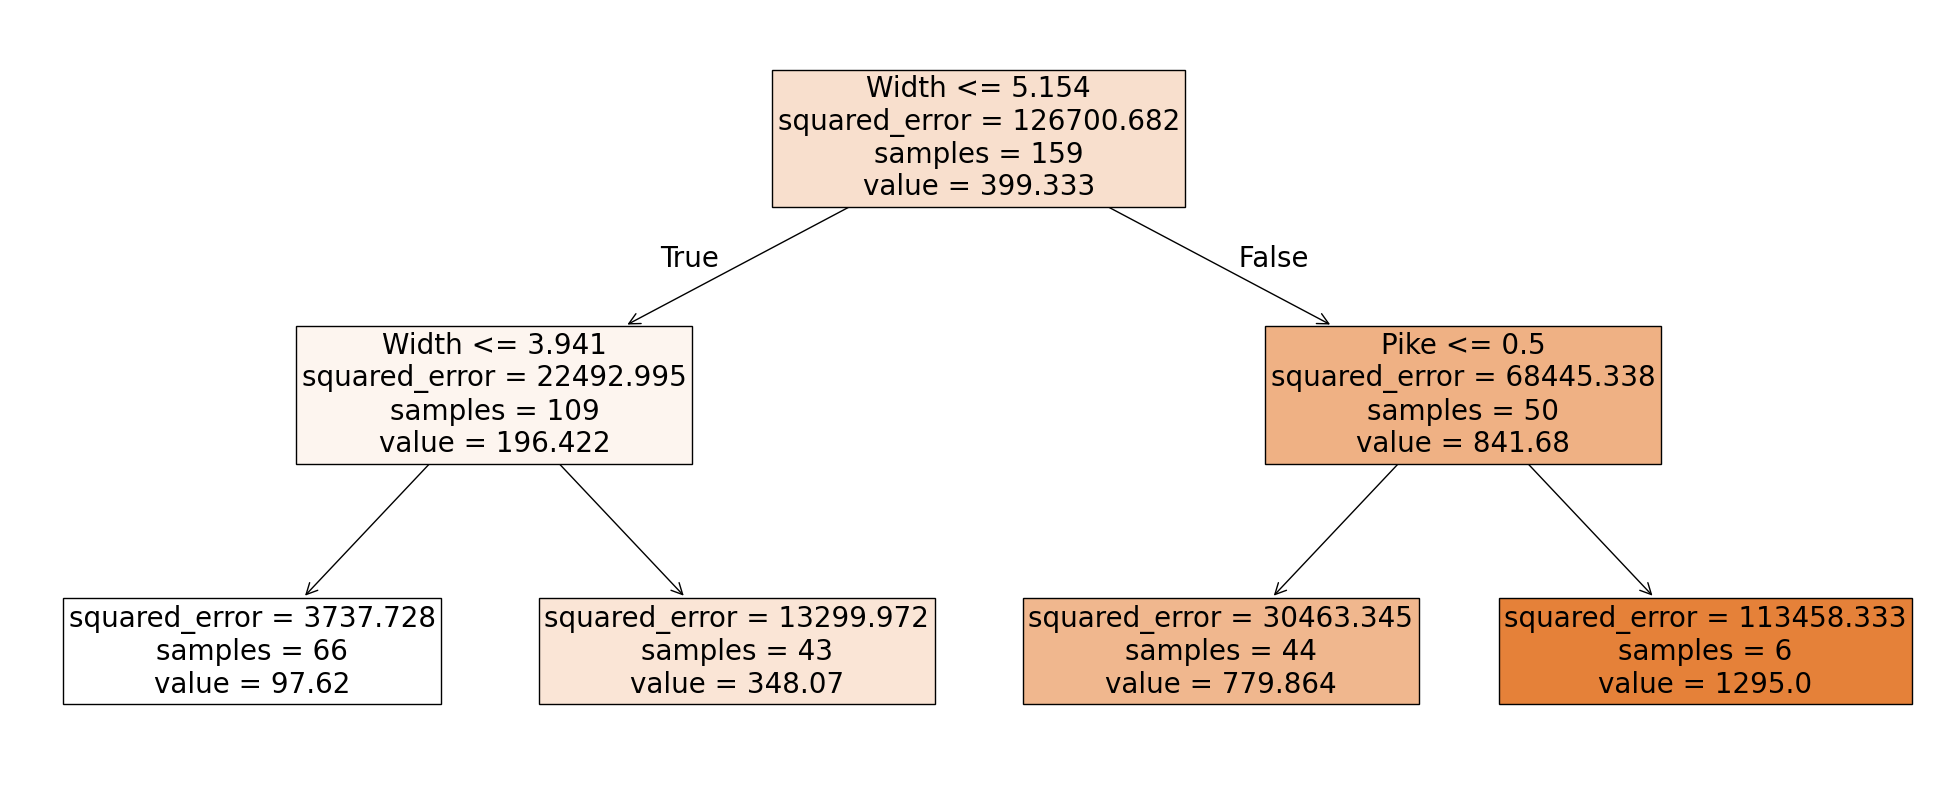

In [244]:
plt.figure(figsize=(25,10))
model5=DecisionTreeRegressor(max_depth=2, min_samples_leaf=2).fit(X4,Y4)
tree.plot_tree(model5,feature_names=X4.columns, fontsize=20,filled=True)
plt.show()

# 5.Задача заказчика

При перевозке живой рыбы в емкостях, где не предусмотрена аэрация воды, необходимо рассчитать, сколько потребуется воды на конкретный период при определенной массе рыбы. Для этого можно использовать данные табл. ниже

Пусть заказчик закупил 100 тыс. годовиков плотвы средняя масса которого неизвестна, но известен размер (Width=3.3), перевозка рыбы будет осуществлена на молоковозе, в цистернах емкостью 3 м3. Продолжительность – 3-4 ч. Необходимо рассчитать количество рейсов (если в распоряжении будет только 1 молоковоз) или количество необходимых машин.

**Текст, выделенный полужирным шрифтом**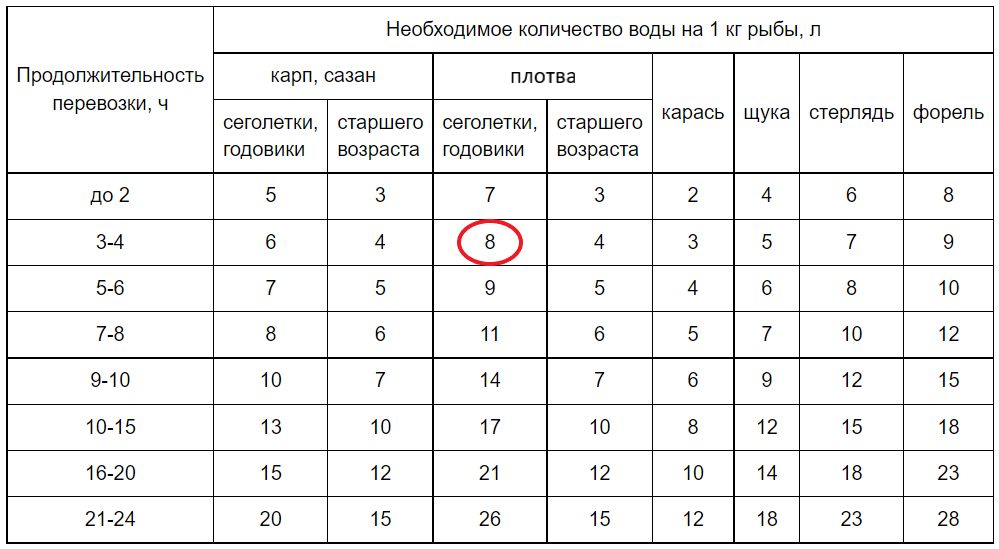

In [245]:
model2 = LR.fit(X2_train,Y2_train) #обучение на выборке train
x_new_fish = [[np.log(3.3),1,0,0,0,0]]
y_new_fish=model2.predict(x_new_fish)
y_new_fish=math.exp(y_new_fish)
print('Прогноз веса рыбы:',round(y_new_fish,2))

Прогноз веса рыбы: 123.97


/home/kreishy/PycharmProjects/tgu/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_36165/4082850695.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_new_fish=math.exp(y_new_fish)


In [246]:
Total_weith_fish=100000*y_new_fish #Общий вес рыбы в граммах
Total_weith_fish

12396558.174073886

In [247]:
Total_water=Total_weith_fish/1000*8 #Переводим граммы в кг
Total_water #Общий объем воды

99172.46539259108

In [248]:
Total_weith=Total_weith_fish/1000+Total_water #Сумма массы рыбы и воды
Total_weith

111569.02356666497

In [249]:
Total_weith/3000 #полученный вес делим на объем молоковоза

37.18967452222166

Для перевозки указанного количетва рыбы необходимо задействовать либо 38 молоковозов, либо 1 молоковоз, но совершить 38 рейсов

# 6.Переобучение и недообучение

## 6.1. Переобучение

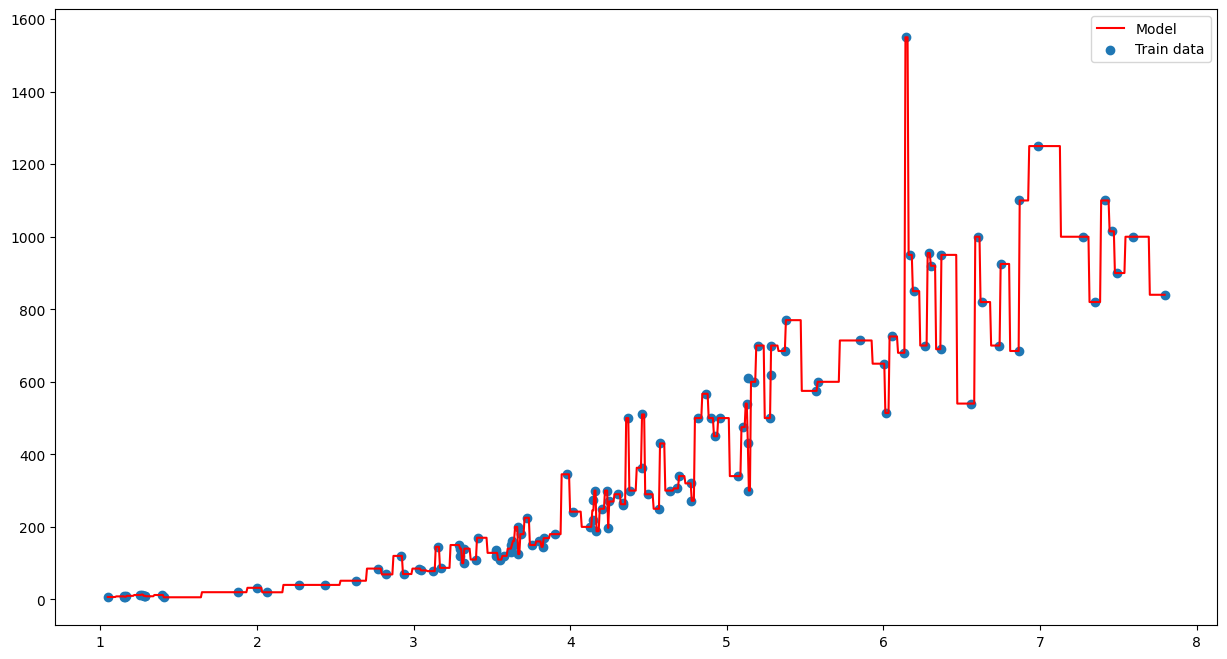

In [250]:
dots = np.linspace(X4_train['Width'].min(), X4_train['Width'].max(), 1000).reshape(-1, 1) #генерации последовательности чисел в линейном пространстве с одинаковым размером шага
dtr = DecisionTreeRegressor(max_depth=50)
model5=dtr.fit(np.array(X4_train['Width']).reshape(-1, 1),Y4_train)
pred_dots = model5.predict(dots)

plt.figure(figsize=(15, 8))
plt.plot(dots, pred_dots, c='r', label='Model');
plt.scatter(X4_train['Width'], Y4_train, label='Train data')
plt.legend();

In [251]:
Y4_train_pred=model5.predict(np.array(X4_train['Width']).reshape(-1, 1)) #предсказание на train
Y4_test_pred=model5.predict(np.array(X4_test['Width']).reshape(-1, 1)) #предсказание на test
DecisionTr=pd.DataFrame(index=QualityMetrics)
DecisionTr.at[QualityMetrics,'Overfitting']=[r2_score(Y4_train,Y4_train_pred),
                                                r2_score(Y4_test,Y4_test_pred),
                                                mean_squared_error(Y4_train,Y4_train_pred),
                                                mean_squared_error(Y4_test,Y4_test_pred)]
DecisionTr

,Overfitting
R2 train,0.999868
R2 test,0.760120
MSE train,14.532178
MSE test,44715.144869


## 6.2. Недообучение

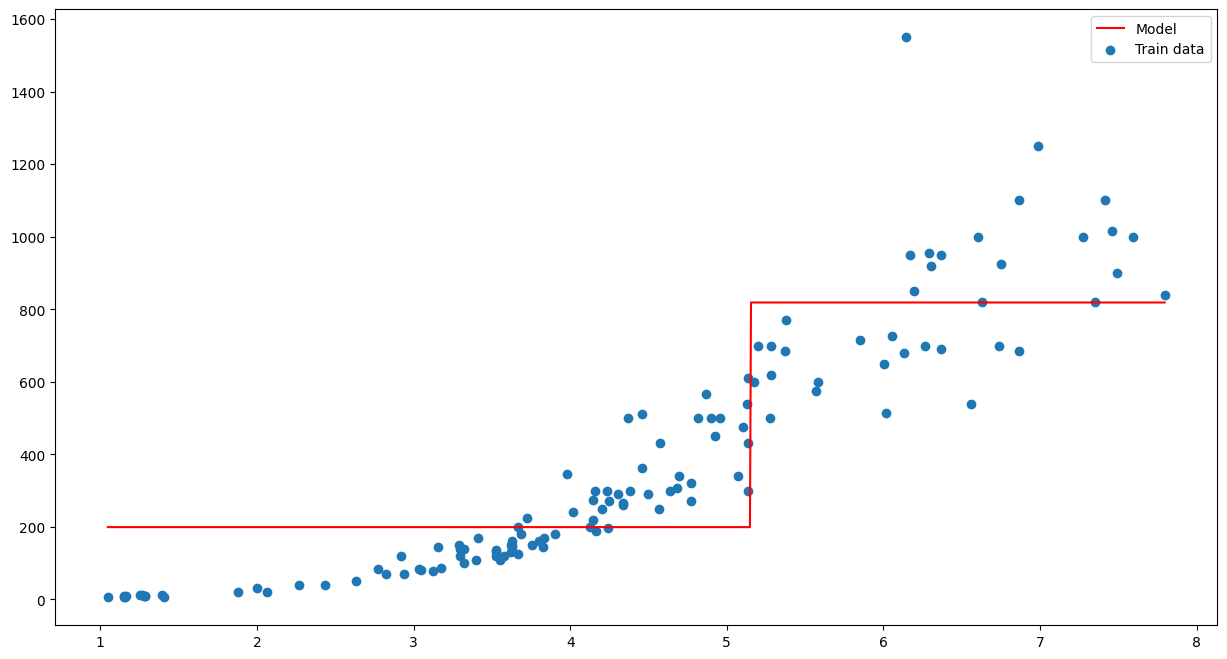

In [252]:
dots = np.linspace(X4_train['Width'].min(), X4_train['Width'].max(), 1000).reshape(-1, 1)
dtr = DecisionTreeRegressor(max_depth=1)
model5=dtr.fit(np.array(X4_train['Width']).reshape(-1, 1),Y4_train)
pred_dots = model5.predict(dots)

plt.figure(figsize=(15, 8))
plt.plot(dots, pred_dots, c='r', label='Model');
plt.scatter(X4_train['Width'], Y4_train, label='Train data')
plt.legend();

In [253]:
Y4_train_pred=model5.predict(np.array(X4_train['Width']).reshape(-1, 1)) #предсказание на train
Y4_test_pred=model5.predict(np.array(X4_test['Width']).reshape(-1, 1)) #предсказание на test
DecisionTr.at[QualityMetrics,'Underfitting']=[r2_score(Y4_train,Y4_train_pred),
                                                r2_score(Y4_test,Y4_test_pred),
                                                mean_squared_error(Y4_train,Y4_train_pred),
                                                mean_squared_error(Y4_test,Y4_test_pred)]
DecisionTr

,Overfitting,Underfitting
R2 train,0.999868,0.721622
R2 test,0.760120,0.661224
MSE train,14.532178,30554.930719
MSE test,44715.144869,63149.859074


## 6.3. Адекватное обучение

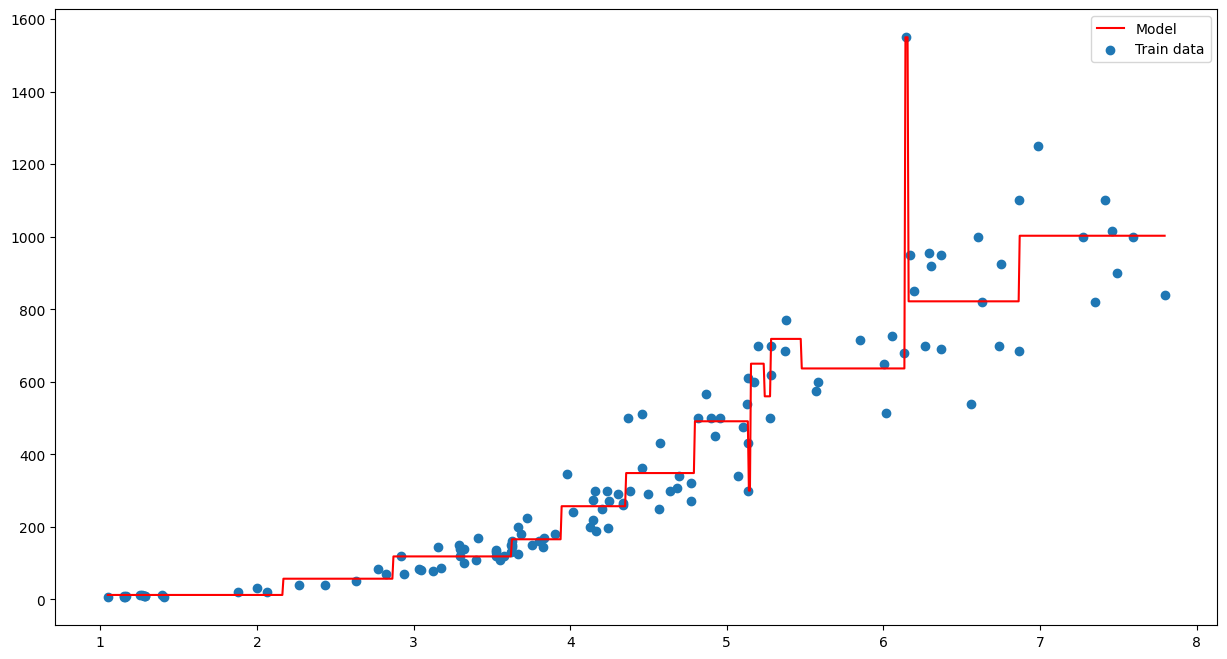

In [254]:
dots = np.linspace(X4_train['Width'].min(), X4_train['Width'].max(), 1000).reshape(-1, 1)
dtr = DecisionTreeRegressor(max_depth=4)
model5=dtr.fit(np.array(X4_train['Width']).reshape(-1, 1),Y4_train)
pred_dots = model5.predict(dots)

plt.figure(figsize=(15, 8))
plt.plot(dots, pred_dots, c='r', label='Model');
plt.scatter(X4_train['Width'], Y4_train, label='Train data')
plt.legend();

In [255]:
Y4_train_pred=model5.predict(np.array(X4_train['Width']).reshape(-1, 1)) #предсказание на train
Y4_test_pred=model5.predict(np.array(X4_test['Width']).reshape(-1, 1)) #предсказание на test
DecisionTr.at[QualityMetrics,'Good fitting']=[r2_score(Y4_train,Y4_train_pred),
                                                r2_score(Y4_test,Y4_test_pred),
                                                mean_squared_error(Y4_train,Y4_train_pred),
                                                mean_squared_error(Y4_test,Y4_test_pred)]
DecisionTr

,Overfitting,Underfitting,Good fitting
R2 train,0.999868,0.721622,0.954330
R2 test,0.760120,0.661224,0.869376
MSE train,14.532178,30554.930719,5012.766346
MSE test,44715.144869,63149.859074,24349.150982
